In [100]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("../")
from definitions import ROOT_DIR

# EDA - Geographical data

## 1. Load data and generate merged dataset

In [101]:
df = pd.read_parquet('../data_files/velocidad_por_provincia_clean.parquet') 

df_aux = pd.read_parquet('../data_files/accesos_por_tecnologia_por_provincia_clean.parquet', columns=['Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total', 'Periodo'])
df = pd.merge(df, df_aux, how='left', on=['Periodo', 'Provincia'])

df_aux = pd.read_parquet('../data_files/penetracion_hogares_clean.parquet', columns=['Provincia', 'Periodo', 'Accesos por cada 100 hogares'])
df = pd.merge(df, df_aux, how='left', on=['Periodo', 'Provincia'])

df_aux = pd.read_parquet('../data_files/penetracion_poblacion_clean.parquet', columns=(['Periodo', 'Provincia', 'Accesos por cada 100 hab']))
df = pd.merge(df, df_aux, how='left', on=['Periodo', 'Provincia'])
print('Dataset shape:', df.shape)
df.info()


Dataset shape: (1008, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         1008 non-null   int64  
 1   Año                           1008 non-null   int64  
 2   Trimestre                     1008 non-null   int64  
 3   Provincia                     1008 non-null   object 
 4   Mbps (Media de bajada)        1008 non-null   float64
 5   Periodo                       1008 non-null   object 
 6   ADSL                          1008 non-null   float64
 7   Cablemodem                    1008 non-null   float64
 8   Fibra óptica                  1008 non-null   float64
 9   Wireless                      1008 non-null   float64
 10  Otros                         1008 non-null   float64
 11  Total                         1008 non-null   float64
 12  Accesos por cada 100 hogares  1000 n

### We have some missed values in the agregated dataset, the details are:

In [102]:
#finds for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Accesos por cada 100 hogares    8
dtype: int64


### the 0 values for Accesos are correct values from the original datasets. For ADSL, Cablemodem, Fibra óptica, Wireless, Otros and Total we have missed values for "Buenos Aires" year 2024 T1, we will copy the mean from 2023T4 and 2024T2.

In [103]:
#For ADSL, Cablemodem, Fibra óptica, Wireless, Otros and Total we have missed values for "Buenos Aires" year 2024 T1, we will copy the mean from 2023T4 and 2024T2.


### The agregated dataset has 1008 rows and 14 columns, the column "Periodo" have an object data type, and have strings values. We will to change the data type to string.

In [104]:
df['Periodo'] = df['Periodo'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         1008 non-null   int64  
 1   Año                           1008 non-null   int64  
 2   Trimestre                     1008 non-null   int64  
 3   Provincia                     1008 non-null   object 
 4   Mbps (Media de bajada)        1008 non-null   float64
 5   Periodo                       1008 non-null   string 
 6   ADSL                          1008 non-null   float64
 7   Cablemodem                    1008 non-null   float64
 8   Fibra óptica                  1008 non-null   float64
 9   Wireless                      1008 non-null   float64
 10  Otros                         1008 non-null   float64
 11  Total                         1008 non-null   float64
 12  Accesos por cada 100 hogares  1000 non-null   float64
 13  Acc

## 1. Numerical Data

### Statistical analysis

In [105]:
df.describe()

,index,Año,Trimestre,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03,1.008000e+03,1.008000e+03,1008.000000,1008.000000,1.008000e+03,1000.000000,1008.000000
mean,503.500000,2018.761905,2.452381,24.720245,1.105253e+05,1.854901e+05,5.161600e+04,12763.989087,6500.710317,3.668961e+05,52.794973,15.602428
std,291.128837,3.039439,1.117574,33.660764,2.294400e+05,4.547329e+05,1.865017e+05,21380.599044,11277.121346,7.881944e+05,24.135063,9.308593
min,0.000000,2014.000000,1.000000,2.573729,2.230000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04,9.513970,0.000000
25%,251.750000,2016.000000,1.000000,4.866698,1.952125e+04,1.101500e+04,3.550000e+02,814.000000,341.500000,6.241825e+04,33.957657,8.953897
50%,503.500000,2019.000000,2.000000,10.089315,4.396750e+04,4.089250e+04,3.224500e+03,5245.000000,1901.000000,1.138345e+05,50.133004,13.599738
75%,755.250000,2021.000000,3.000000,29.875292,8.804050e+04,7.715925e+04,3.109275e+04,14531.000000,7622.000000,1.961585e+05,67.010861,20.296448
max,1007.000000,2024.000000,4.000000,234.440000,1.586343e+06,2.797700e+06,1.849476e+06,138638.000000,73415.000000,5.011620e+06,124.061394,52.236739


- The year column have the stimated values, between 2014 and 2024. The quarter column have the values 1, 2, 3 and 4.
- The MBPS have values between 2.5 and 234, with a mean of 24.7 and a standard deviation of 33.6.
- The acceses by 100 habs have values between 9.5 and 124.0 with a mean of 52.7 and a standard deviation of 24.13.
- The acceses by 100 hogares have values between 0 and 52.2 with a mean of 15.6 and a standard deviation of 9.3.

### Correlationship between variables

#### Provinicia vs MBPS vs Accesos (habs and hogares)

In [106]:
#Correlation matrix
selected_columns = ['Provincia', 'Mbps (Media de bajada)', 'Accesos por cada 100 hogares', 'Accesos por cada 100 hab']

#converts categorical "Provincia"data into dummy variables
df_corr = pd.get_dummies(df[selected_columns])

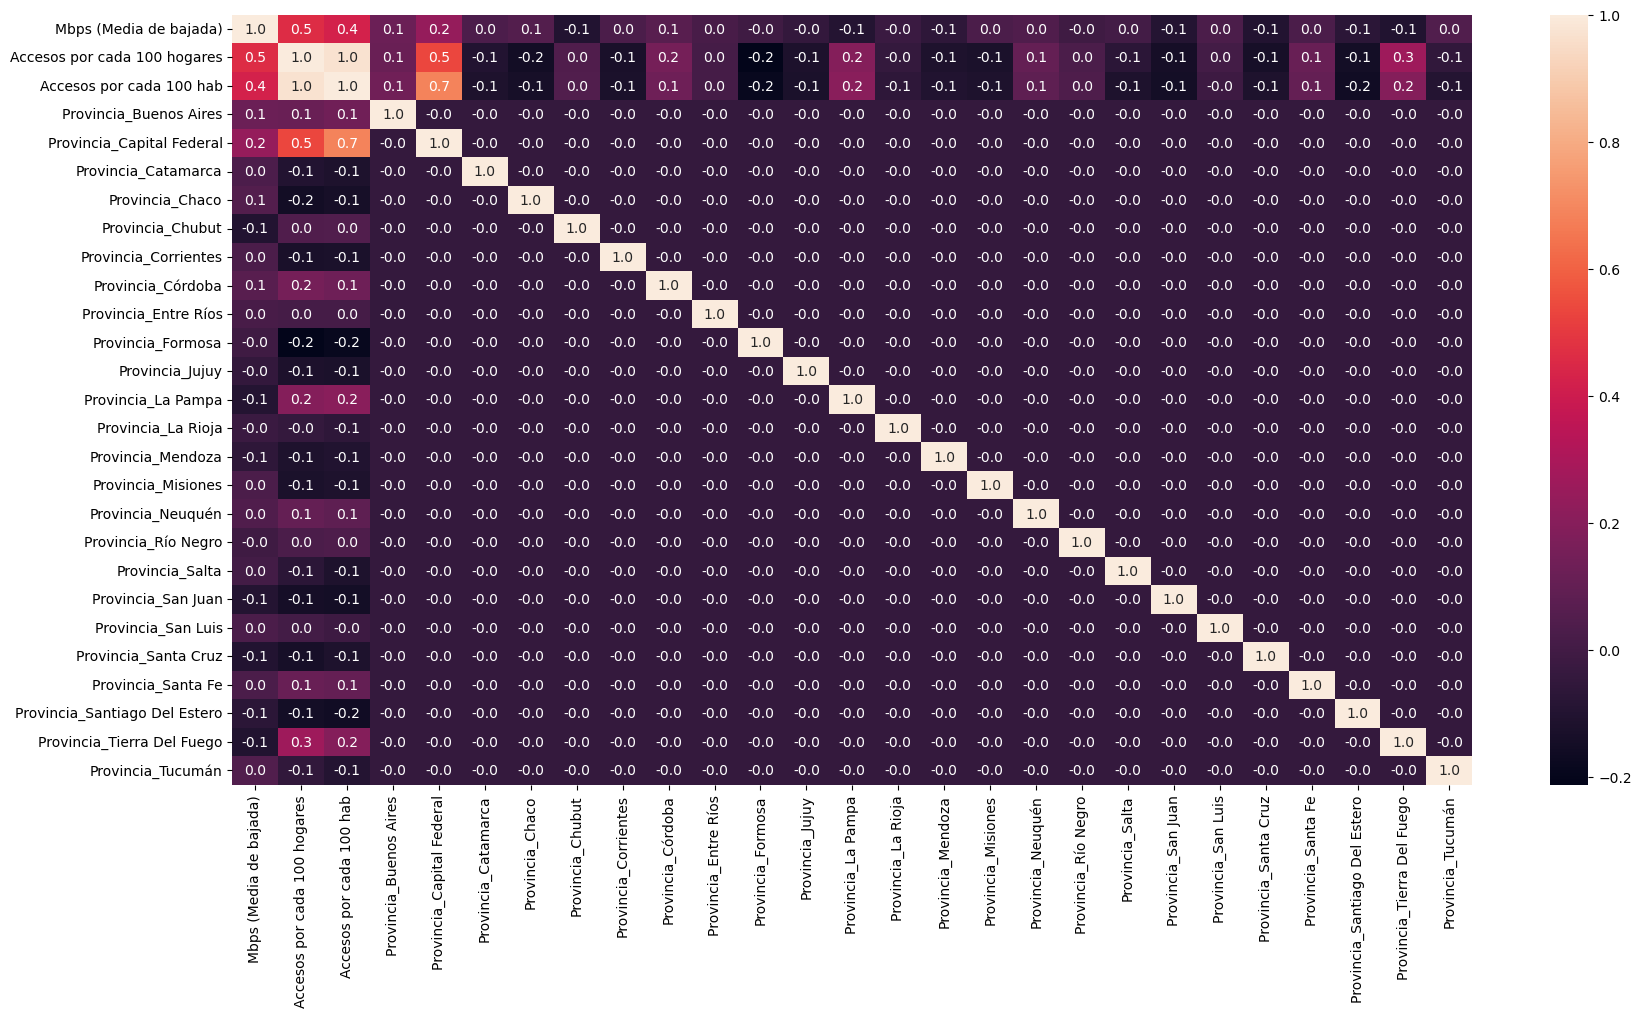

In [107]:
fix, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt='.1f')
plt.show()

#### We found a very high correlation between "Accesos por hogares" and "Accesos por habitante", the relation between this 2 varaibles is lineal. And a high correlation (0,7) between "Accesos por hogares" and "Capital Federal" province, this means the behaivor of Capita Federal have a high influence in the total number of accesses.

## Time series analysis for quarter ('Trimestre') and state ('Provincia')

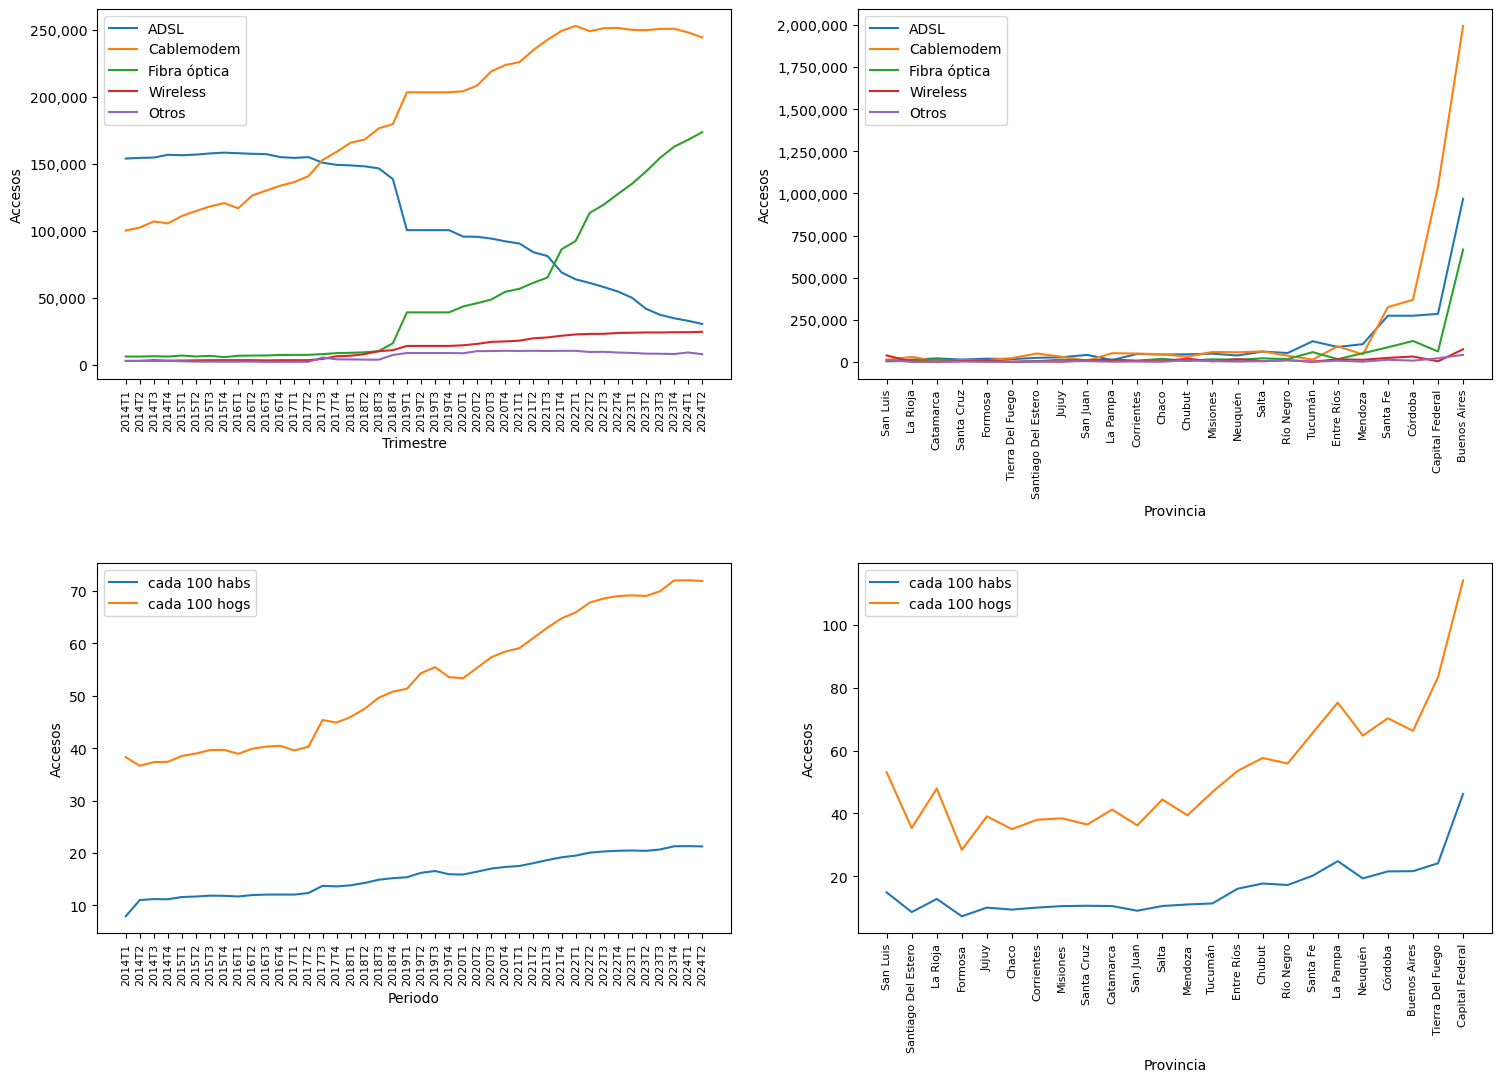

In [108]:
df = df.sort_values(['Periodo'])
fig, ax = plt.subplots(2,2,figsize=(18,12))

#first plot technology by year
sns.lineplot(data=df, x=df['Periodo'], y=df['ADSL'], ax=ax[0,0], label='ADSL', errorbar=None)
sns.lineplot(data=df, x=df['Periodo'], y=df['Cablemodem'], ax=ax[0,0], label='Cablemodem', errorbar=None)
sns.lineplot(data=df, x=df['Periodo'], y=df['Fibra óptica'], ax=ax[0,0], label='Fibra óptica', errorbar=None)
sns.lineplot(data=df, x=df['Periodo'], y=df['Wireless'], ax=ax[0,0], label='Wireless', errorbar=None)
sns.lineplot(data=df, x=df['Periodo'], y=df['Otros'], ax=ax[0,0], label='Otros', errorbar=None)

ax[0,0].set(xlabel='Trimestre', ylabel='Accesos')
ax[0,0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0,0].tick_params(axis='x', rotation=90, labelsize=8)
#plt.show()


df = df.sort_values(['Total'])
#second plot 
sns.lineplot(data=df, x=df['Provincia'], y=df['ADSL'], ax=ax[0,1], label='ADSL', errorbar=None)
sns.lineplot(data=df, x=df['Provincia'], y=df['Cablemodem'], ax=ax[0,1], label='Cablemodem', errorbar=None)
sns.lineplot(data=df, x=df['Provincia'], y=df['Fibra óptica'], ax=ax[0,1], label='Fibra óptica', errorbar=None)
sns.lineplot(data=df, x=df['Provincia'], y=df['Wireless'], ax=ax[0,1], label='Wireless', errorbar=None)
sns.lineplot(data=df, x=df['Provincia'], y=df['Otros'], ax=ax[0,1], label='Otros', errorbar=None)

ax[0,1].set(xlabel='Provincia', ylabel='Accesos')
ax[0,1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0,1].tick_params(axis='x', rotation=90, labelsize=8)
#plt.show()

#third plot
df = df.sort_values(['Periodo'])
sns.lineplot(data=df, x=df['Periodo'], y=df['Accesos por cada 100 hab'], ax=ax[1,0], label='cada 100 habs', errorbar=None)
sns.lineplot(data=df, x=df['Periodo'], y=df['Accesos por cada 100 hogares'], ax=ax[1,0], label='cada 100 hogs', errorbar=None)
ax[1,0].set(xlabel='Periodo', ylabel='Accesos')
ax[1,0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[1,0].tick_params(axis='x', rotation=90, labelsize=8)

#fourth plot
df = df.sort_values(['Accesos por cada 100 hogares'])
sns.lineplot(data=df, x=df['Provincia'], y=df['Accesos por cada 100 hab'], ax=ax[1,1], label='cada 100 habs', errorbar=None)
sns.lineplot(data=df, x=df['Provincia'], y=df['Accesos por cada 100 hogares'], ax=ax[1,1], label='cada 100 hogs', errorbar=None)
ax[1,1].set(xlabel='Provincia', ylabel='Accesos')
ax[1,1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[1,1].tick_params(axis='x', rotation=90, labelsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

#### We can see a big growth pattern in the last 4 years for 'Cablemodem' and 'Fibra Óptica' technologies. This growth is focalized in Santa Fé, Córdoba, Capital Federal and Buenos Aires provinces. For accesses concept, the top 5 are San Luis, La Rioja, La Pampa, Córdoba y Capital Federal.

## Save dataset to parquet file


In [109]:
df=df.reset_index()
df.to_parquet(ROOT_DIR + '/data_files/provincias_eda_clean.parquet')